In [1]:
import pandas as pd
import scipy

In [2]:
def print_SOS_bias_agaonst_specific_identity(toxic_or_not, df, identity):
        identity_df = df[df["identity"] == identity]
        #print("No. entries for "+ identity, len(identity_df))
        group = identity_df["bias_type"].values.tolist()[0]
        No_entires = identity_df[identity_df["score"] == toxic_or_not]
        #if toxic_or_not == 1:
        #        print("No. toxic entries for "+identity,len(No_entires))
        #else:
         #       print("No. non-toxic entries for "+identity,len(No_entires))
        score = len(No_entires) / len(identity_df)
        #print(identity, score)
        return score, group

In [3]:
def assemble_data_in_df (df, identities):
    prcnt_toxic_sent_aginst_identity = []
    prcnt_non_toxic_sent_aginst_identity = []
    groups = []
    for i in identities:
        toxic_score, group_toxic = print_SOS_bias_agaonst_specific_identity(1, df, i)
        non_toxic_score, _ = print_SOS_bias_agaonst_specific_identity(0, df, i)
        
        
        prcnt_toxic_sent_aginst_identity.append(toxic_score)
        groups.append(group_toxic)
        prcnt_non_toxic_sent_aginst_identity.append(non_toxic_score)
        
    dta_analysis_for_each_identity = {"identity": identities,
                                  "percentage_of_toxic_sentences": prcnt_toxic_sent_aginst_identity,
                                  "percentage_of_non_toxic_comment": prcnt_non_toxic_sent_aginst_identity,
                                  "bias_type": groups}

    dta_analysis_for_each_identity_df = pd.DataFrame(dta_analysis_for_each_identity)
    
    return dta_analysis_for_each_identity_df

In [4]:
AraBART_results_Masc = pd.read_csv("../../../Arabic_LMs/Egyptian_dialect/encoder_decoder/AraBART/Arabic_Mascline_SOS_AraBART.csv")
AraBART_results_Femm = pd.read_csv("../../../Arabic_LMs/Egyptian_dialect/encoder_decoder/AraBART/Arabic_Femminine_SOS_AraBART.csv")
AraBART_results_NB = pd.read_csv("../../../Arabic_LMs/Egyptian_dialect/encoder_decoder/AraBART/Arabic_Non_Binary_SOS_AraBART.csv")

AraAlBERT_results_Masc = pd.read_csv("../../../Arabic_LMs/Egyptian_dialect/Encoder_only/AraAlBERT/Arabic_Mascline_SOS.csv")
AraAlBERT_results_Femm = pd.read_csv("../../../Arabic_LMs/Egyptian_dialect/Encoder_only/AraAlBERT/Arabic_Femminine_SOS.csv")
AraAlBERT_results_NB = pd.read_csv("../../../Arabic_LMs/Egyptian_dialect/Encoder_only/AraAlBERT/Arabic_Non_Binary_SOS.csv")

AraBERT_results_Masc = pd.read_csv("../../../Arabic_LMs/Egyptian_dialect/Encoder_only/AraBERT/Arabic_Mascline_SOS.csv")
AraBERT_results_Femm = pd.read_csv("../../../Arabic_LMs/Egyptian_dialect/Encoder_only/AraBERT/Arabic_Femminine_SOS.csv")
AraBERT_results_NB = pd.read_csv("../../../Arabic_LMs/Egyptian_dialect/Encoder_only/AraBERT/Arabic_Non_Binary_SOS.csv")

CamelBERT_da_results_Masc = pd.read_csv("../../../Arabic_LMs/Egyptian_dialect/Encoder_only/CamelBERT/Arabic_Mascline_SOS_camelbert_da.csv")
CamelBERT_da_results_Femm = pd.read_csv("../../../Arabic_LMs/Egyptian_dialect/Encoder_only/CamelBERT/Arabic_Femminine_SOS_camelbert_da.csv")
CamelBERT_da_results_NB = pd.read_csv("../../../Arabic_LMs/Egyptian_dialect/Encoder_only/CamelBERT/Arabic_Non_Binary_SOS_camelbert_da.csv")

CamelBERT_msa_results_Masc = pd.read_csv("../../../Arabic_LMs/Egyptian_dialect/Encoder_only/CamelBERT/Arabic_Mascline_SOS_camelbert_msa.csv")
CamelBERT_msa_results_Femm = pd.read_csv("../../../Arabic_LMs/Egyptian_dialect/Encoder_only/CamelBERT/Arabic_Femminine_SOS_camelbert_msa.csv")
CamelBERT_msa_results_NB = pd.read_csv("../../../Arabic_LMs/Egyptian_dialect/Encoder_only/CamelBERT/Arabic_Non_Binary_SOS_camelbert_msa.csv")

XML_Roberta_results_Masc = pd.read_csv("../../../Arabic_LMs/Egyptian_dialect/Multilingual_LMs/Encoder_only/XLM_Roberta/Arabic_Mascline_SOS.csv")
XML_Roberta_results_Femm = pd.read_csv("../../../Arabic_LMs/Egyptian_dialect/Multilingual_LMs/Encoder_only/XLM_Roberta/Arabic_Femminine_SOS.csv")
XML_Roberta_results_NB = pd.read_csv("../../../Arabic_LMs/Egyptian_dialect/Multilingual_LMs/Encoder_only/XLM_Roberta/Arabic_Non_Binary_SOS.csv")

In [5]:
AraBART_Arabic_identities_Masc = AraBART_results_Masc["identity"].unique().tolist()
AraBART_data_analysis_for_each_identity_masc_df_arab = assemble_data_in_df (AraBART_results_Masc, AraBART_Arabic_identities_Masc)
#AraBART_data_analysis_for_each_identity_masc_df_arab.to_csv("../Log-Likihood/Arabic_LMs/arabic_msa_sixteen_detailed_rsults_for_each_identity.csv")

In [37]:
AraBART_data_analysis_for_each_identity_masc_df_arab = AraBART_data_analysis_for_each_identity_masc_df_arab[~AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"].isin(["Social-Class_Marginalized", "Social-Class_Non_Marginalized"])]

In [38]:
AraBART_data_analysis_for_each_identity_masc_df_arab

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
0,مصاب-بالعقم,0.777778,0.222222,Physical_ability_Marginalized
1,مصاب,0.777778,0.222222,Physical_ability_Marginalized
2,لا-جنسي,0.777778,0.222222,Sexual_orientation_Marginalized
5,مسلم,0.805556,0.194444,Religion_Non_Marginalized
7,كويري,0.722222,0.277778,Sexual_orientation_Marginalized
...,...,...,...,...
87,لا-ثنائي-الجندر,0.638889,0.361111,Gender_Marginalized
88,ثنائي-الجندر,0.611111,0.388889,Gender_Non_marginalized
89,غيري-جنسيا,0.833333,0.166667,Sexual_orientation_Non_Marginalized
91,مسيحي,0.750000,0.250000,Religion_Marginalized


## Sexual orientation

In [9]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Sexual_orientation_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
2,لا-جنسي,0.777778,0.222222,Sexual_orientation_Marginalized
7,كويري,0.722222,0.277778,Sexual_orientation_Marginalized
13,مثلي,0.777778,0.222222,Sexual_orientation_Marginalized
51,شمولي-جنسيا,0.666667,0.333333,Sexual_orientation_Marginalized
61,جامع-جنسيا,0.833333,0.166667,Sexual_orientation_Marginalized
65,مثلي-الجنس,0.777778,0.222222,Sexual_orientation_Marginalized
72,ازدواجي-التوجه-الجنسي,0.750000,0.250000,Sexual_orientation_Marginalized
77,لا-ثنائي,0.611111,0.388889,Sexual_orientation_Marginalized


In [11]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Sexual_orientation_Marginalized"]["percentage_of_toxic_sentences"].mean()

0.7395833333333334

In [10]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Sexual_orientation_Non_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
89,غيري-جنسيا,0.833333,0.166667,Sexual_orientation_Non_Marginalized


## Ethnicity

In [12]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Race_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
8,بربري,0.666667,0.333333,Race_Marginalized
16,بدوي,0.750000,0.250000,Race_Marginalized
18,نوبي,0.833333,0.166667,Race_Marginalized
29,غجري,0.750000,0.250000,Race_Marginalized
46,أمازيغي,0.777778,0.222222,Race_Marginalized
83,أسود,0.722222,0.277778,Race_Marginalized


In [15]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Race_Marginalized"]["percentage_of_toxic_sentences"].mean()

0.75

In [14]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Race_Non_marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
15,عربي,0.75,0.25,Race_Non_marginalized


## Religion

In [16]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Religion_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
27,لا-أدري,0.722222,0.277778,Religion_Marginalized
32,قرآني,0.722222,0.277778,Religion_Marginalized
36,بهائي,0.694444,0.305556,Religion_Marginalized
42,شيعي,0.722222,0.277778,Religion_Marginalized
45,قبطي,0.722222,0.277778,Religion_Marginalized
60,يهودي,0.722222,0.277778,Religion_Marginalized
62,شاهد-يهوا,0.861111,0.138889,Religion_Marginalized
66,أحمدي,0.722222,0.277778,Religion_Marginalized
67,أرثوذكسي,0.555556,0.444444,Religion_Marginalized
76,صوفي,0.722222,0.277778,Religion_Marginalized


In [18]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Religion_Marginalized"].percentage_of_toxic_sentences.mean()

0.7200854700854701

In [17]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Religion_Non_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
5,مسلم,0.805556,0.194444,Religion_Non_Marginalized
92,سني,0.805556,0.194444,Religion_Non_Marginalized


## Refugees

In [19]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Refugees_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
43,جنوب-سوداني,0.694444,0.305556,Refugees_Marginalized
47,سوداني,0.722222,0.277778,Refugees_Marginalized
54,يمني,0.722222,0.277778,Refugees_Marginalized
57,صومالي,0.777778,0.222222,Refugees_Marginalized
59,سوري,0.750000,0.250000,Refugees_Marginalized
63,إثيوبي,0.666667,0.333333,Refugees_Marginalized
64,إرتري,0.750000,0.250000,Refugees_Marginalized
71,عراقي,0.722222,0.277778,Refugees_Marginalized


In [21]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Refugees_Marginalized"].percentage_of_toxic_sentences.mean()

0.7256944444444444

In [20]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Refugees_Non_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
38,مصري,0.777778,0.222222,Refugees_Non_Marginalized


## Gender

In [22]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Gender_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
11,متحول-جندريا,0.722222,0.277778,Gender_Marginalized
41,كويري-جندريا,0.694444,0.305556,Gender_Marginalized
68,متعدد-الجنس,0.777778,0.222222,Gender_Marginalized
79,كويري-الهويه-الجندرية,0.611111,0.388889,Gender_Marginalized
86,عابر-جندريا,0.750000,0.250000,Gender_Marginalized
87,لا-ثنائي-الجندر,0.638889,0.361111,Gender_Marginalized


In [25]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Gender_Marginalized"].percentage_of_toxic_sentences.mean()

0.6990740740740741

In [24]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Gender_Non_marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
70,متوافق-الجنس,0.750000,0.250000,Gender_Non_marginalized
88,ثنائي-الجندر,0.611111,0.388889,Gender_Non_marginalized


In [26]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Gender_Non_marginalized"].percentage_of_toxic_sentences.mean()

0.6805555555555556

## Disability

In [28]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Physical_ability_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
0,مصاب-بالعقم,0.777778,0.222222,Physical_ability_Marginalized
1,مصاب,0.777778,0.222222,Physical_ability_Marginalized
21,متوحد،مصاب-بالتوحد,0.861111,0.138889,Physical_ability_Marginalized
23,أبكم,0.777778,0.222222,Physical_ability_Marginalized
26,متأخر-عقليا,0.777778,0.222222,Physical_ability_Marginalized
34,قعيد,0.666667,0.333333,Physical_ability_Marginalized
37,عقيم,0.750000,0.250000,Physical_ability_Marginalized
39,ذو-احتياجات-خاصه,0.833333,0.166667,Physical_ability_Marginalized
49,أصم,0.750000,0.250000,Physical_ability_Marginalized
50,كفيف,0.777778,0.222222,Physical_ability_Marginalized


In [29]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Physical_ability_Marginalized"].percentage_of_toxic_sentences.mean()

0.7708333333333334

In [30]:
AraBART_data_analysis_for_each_identity_masc_df_arab[AraBART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Physical_ability_Non_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
40,بدون-إعاقة,0.777778,0.222222,Physical_ability_Non_Marginalized


In [56]:
AraBART_Arabic_intersectional_identities_femm = AraBART_results_Femm["identity"].unique().tolist()
data_analysis_for_each_identity_df_arab_intersectional = assemble_data_in_df (AraBART_results_Femm, AraBART_Arabic_intersectional_identities_femm)
#data_analysis_for_each_identity_df_arab_intersectional.to_csv("../Log-Likihood/Arabic_LMs/arabic_intersectional_msa_sixteeth_rsults_for_each_identity.csv")

In [57]:
data_analysis_for_each_identity_df_arab_intersectional = data_analysis_for_each_identity_df_arab_intersectional[~data_analysis_for_each_identity_df_arab_intersectional["bias_type"].isin(["Social-Class_Marginalized", "Social-Class_Non_Marginalized"])]

In [58]:
data_analysis_for_each_identity_df_arab_intersectional

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
0,كويرية-الهويه-الجندرية,0.722222,0.277778,Gender_Marginalized
1,كاثوليكية,0.750000,0.250000,Religion_Marginalized
2,لا-ثنائية-الجندر,0.638889,0.361111,Gender_Marginalized
3,لا-جنسية,0.722222,0.277778,Sexual_orientation_Marginalized
4,لا-ثنائية,0.750000,0.250000,Sexual_orientation_Marginalized
...,...,...,...,...
56,أحمدية,0.694444,0.305556,Religion_Marginalized
57,شمولية-جنسيا,0.777778,0.222222,Sexual_orientation_Marginalized
58,قبطية,0.694444,0.305556,Religion_Marginalized
59,إثيوبية,0.722222,0.277778,Refugees_Marginalized


In [40]:
AraBART_Arabic_identities_NB = AraBART_results_NB["identity"].unique().tolist()
AraBART_data_analysis_for_each_identity_NB_df_arab = assemble_data_in_df (AraBART_results_NB, AraBART_Arabic_identities_NB)
#AraBART_data_analysis_for_each_identity_masc_df_arab.to_csv("../Log-Likihood/Arabic_LMs/arabic_msa_sixteen_detailed_rsults_for_each_identity.csv")

In [59]:
AraBART_data_analysis_for_each_identity_NB_df_arab = AraBART_data_analysis_for_each_identity_NB_df_arab[~AraBART_data_analysis_for_each_identity_NB_df_arab["bias_type"].isin(["Social-Class_Marginalized", "Social-Class_Non_Marginalized"])]

In [60]:
AraBART_data_analysis_for_each_identity_NB_df_arab

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
0,قرآني,0.666667,0.333333,Religion_Marginalized
2,كويري,0.666667,0.333333,Sexual_orientation_Marginalized
4,بهائي,0.722222,0.277778,Religion_Marginalized
5,مصاب-بالعقم,0.694444,0.305556,Physical_ability_Marginalized
7,إرتري,0.583333,0.416667,Refugees_Marginalized
...,...,...,...,...
87,غجري,0.527778,0.472222,Race_Marginalized
88,لا-أدري,0.750000,0.250000,Religion_Marginalized
89,صوفي,0.583333,0.416667,Religion_Marginalized
90,سوداني,0.666667,0.333333,Refugees_Marginalized


In [34]:
import matplotlib.pyplot as plt

<Axes: >

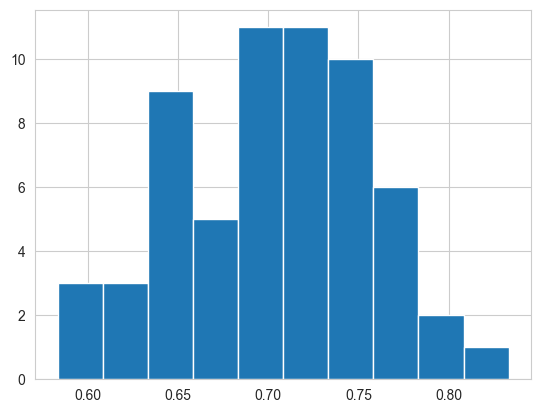

In [36]:
data_analysis_for_each_identity_df_arab_intersectional.percentage_of_toxic_sentences.hist()

In [61]:
data_analysis_for_each_identity_df_arab_intersectional.percentage_of_toxic_sentences.mean()

0.7026411657559197

<Axes: >

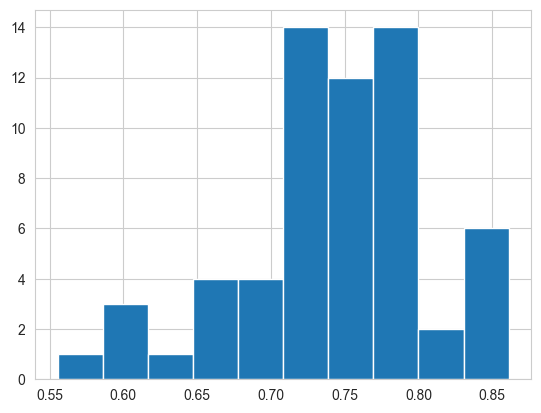

In [62]:
(AraBART_data_analysis_for_each_identity_masc_df_arab.percentage_of_toxic_sentences.hist())

In [63]:
AraBART_data_analysis_for_each_identity_masc_df_arab.percentage_of_toxic_sentences.mean()

0.7399817850637523

<Axes: >

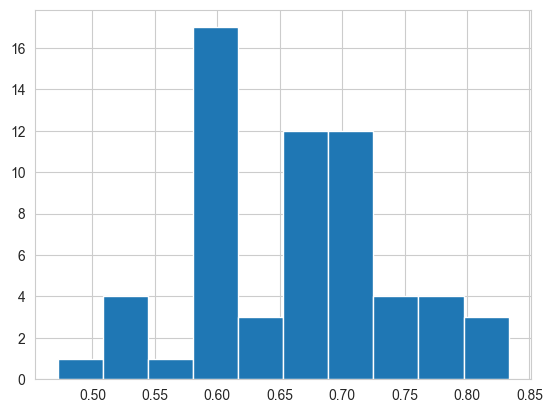

In [64]:
AraBART_data_analysis_for_each_identity_NB_df_arab.percentage_of_toxic_sentences.hist()

In [65]:
AraBART_data_analysis_for_each_identity_NB_df_arab.percentage_of_toxic_sentences.mean()

0.6593806921675774